# Exercises

In [1]:
import matplotlib.pyplot as plt
from nltk import ConditionalFreqDist, FreqDist
from nltk.book import text1, text2, text3, text4, text5, text6, text7, text8, text9
from nltk.corpus import (brown, gutenberg, names, state_union, swadesh, webtext, 
                         wordnet as wn)
import pandas as pd
import seaborn as sns

sns.set()
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### 1. Create a variable ```phrase``` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [2]:
phrase = ["Today", "is", "Monday", "."]

In [3]:
phrase + phrase

['Today', 'is', 'Monday', '.', 'Today', 'is', 'Monday', '.']

In [4]:
phrase * 3

['Today',
 'is',
 'Monday',
 '.',
 'Today',
 'is',
 'Monday',
 '.',
 'Today',
 'is',
 'Monday',
 '.']

In [5]:
phrase.index("is")

1

In [6]:
phrase[1:3]

['is', 'Monday']

In [7]:
sorted(phrase, reverse=True)

['is', 'Today', 'Monday', '.']

### 2. Use the corpus module to explore ```austen-persuasion.txt```. How many word tokens does this book have? How many word types?

In [8]:
persuasion = gutenberg.words('austen-persuasion.txt')

In [9]:
len(persuasion)

98171

In [10]:
len(set(persuasion))

6132

### 3. Use the Brown corpus reader ```nltk.corpus.brown.words()``` or the Web text corpus reader ```nltk.corpus.webtext.words()``` to access some sample text in two different genres.

In [11]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [12]:
brown.words(categories='editorial')

['Assembly', 'session', 'brought', 'much', 'good', ...]

In [13]:
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [14]:
firefox_id = webtext.fileids()[0]

webtext.words(fileids=firefox_id)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [15]:
wine_id = webtext.fileids()[-1]

webtext.words(fileids=wine_id)

['Lovely', 'delicate', ',', 'fragrant', 'Rhone', ...]

### 4. Read in the texts of the *State of the Union* addresses, using the ```state_union``` corpus reader. Count occurrences of ```men```, ```women```, and ```people``` in each document. What has happened to the usage of these words over time?

In [16]:
state_union_words = state_union.words()

In [17]:
print("men", "women", "people", sep='\t')
for fileid in state_union.fileids():
    fdist = FreqDist(state_union.words(fileids=fileid))
    print(fdist["men"], fdist["women"], fdist["people"], sep='\t')

men	women	people
2	2	10
12	7	49
7	2	12
4	1	22
2	1	15
6	2	15
8	2	9
3	0	17
2	0	15
4	0	26
2	2	30
5	2	11
2	1	19
4	1	11
2	0	10
6	0	10
6	2	10
0	0	3
8	5	12
3	1	3
7	0	16
11	3	14
12	1	35
11	1	25
4	0	17
5	2	6
2	0	23
1	0	31
1	0	7
0	0	9
0	0	19
0	0	13
3	1	18
2	1	17
0	1	26
0	1	15
1	2	11
1	1	11
1	1	17
3	7	19
3	5	23
1	1	12
2	2	14
1	0	24
1	0	16
2	3	13
3	2	9
2	2	13
7	7	13
4	4	26
1	2	45
1	1	63
1	3	73
2	3	40
1	2	30
2	2	22
2	3	22
5	6	41
3	3	14
1	2	12
3	5	14
6	4	33
6	8	21
8	11	18
7	7	22


In [18]:
is_ratio = False

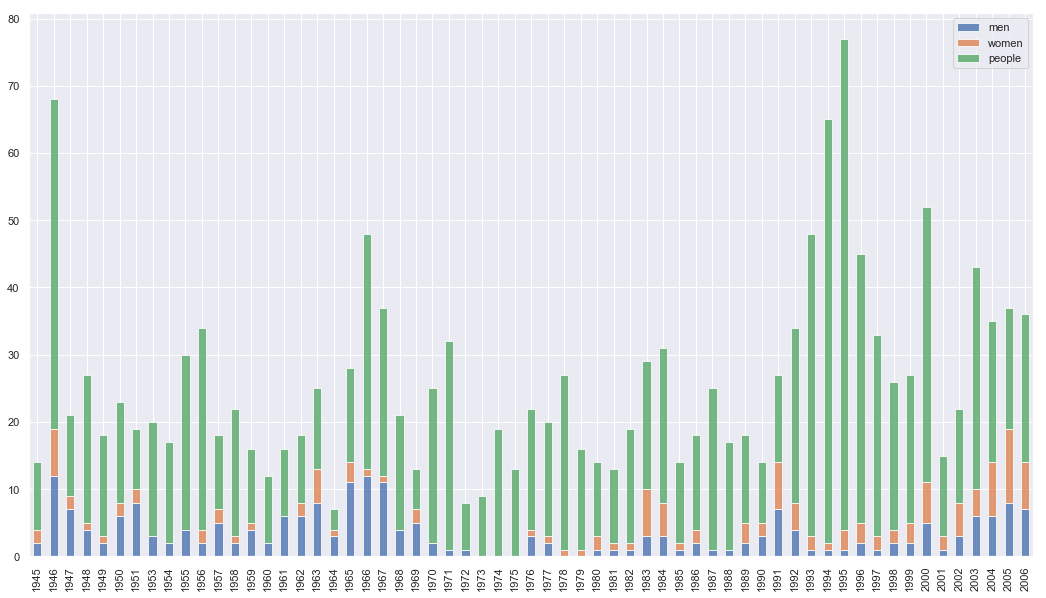

In [19]:
df_state_union = pd.DataFrame(index=["men", "women", "people"])

for fileid in state_union.fileids():
    year = fileid.split('-')[0]
    fdist = FreqDist(state_union.words(fileids=fileid))
    if is_ratio:
        total = fdist["men"] + fdist["women"] + fdist["people"]
    else:
        total = 1
    df_state_union.loc["men", year] = fdist["men"] / total
    df_state_union.loc["women", year] = fdist["women"] / total
    df_state_union.loc["people", year] = fdist["people"] / total

df_state_union = df_state_union.transpose()
df_state_union.plot(kind='bar', figsize=(18,10), stacked=True, alpha=0.8)

The usage of the words has fluctuated over time. For example, it increased from from 1990 to 1995 but decreased from 1996 to 1998. Also the usage of ```women``` is increased since 2001.

### 5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: ```member_meronyms()```, ```part_meronyms()```, ```substance_meronyms()```, ```member_holonyms()```, ```part_holonyms()```, and ```substance_holonyms()```.

In [20]:
wn.synsets("car")

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [21]:
car = wn.synsets("car")[0]

In [22]:
car.member_meronyms()

[]

In [23]:
car.part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

In [24]:
car.substance_meronyms()

[]

In [25]:
car.member_holonyms()

[]

In [26]:
car.part_holonyms()

[]

In [27]:
car.substance_meronyms()

[]

In [28]:
wn.synsets("accelerator")

[Synset('accelerator.n.01'),
 Synset('accelerator.n.02'),
 Synset('catalyst.n.01'),
 Synset('accelerator.n.04')]

In [29]:
accelerator = wn.synsets("accelerator")[0]

In [30]:
accelerator.member_meronyms()

[]

In [31]:
accelerator.part_meronyms()

[]

In [32]:
accelerator.substance_meronyms()

[]

In [33]:
accelerator.member_holonyms()

[]

In [34]:
accelerator.part_holonyms()

[Synset('airplane.n.01'), Synset('car.n.01')]

In [35]:
accelerator.substance_holonyms()

[]

### 6. In the discussion of comparative wordlists, we created an object called ```translate``` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

In [36]:
de = set(word[0] for word in swadesh.entries(['de']))
es = set(word[0] for word in swadesh.entries(['es']))
common_words = de.intersection(es)

common_words

set()

If both German and Spanish share in common a word with same spelling but different meanings, then one of the corresponding English words will be lost after ```translate``` is updated. One idea to avoid this problem is as follows:

In [37]:
translate = {}
de2en = swadesh.entries(['de', 'en'])
translate.update({'de': dict(de2en)})
es2en = swadesh.entries(['es', 'en'])
translate.update({'es': dict(es2en)})

In [38]:
translate['de']['Hund']

'dog'

In [39]:
translate['es']['perro']

'dog'

### 7. According to Strunk and White's *Elements of Style*, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the *LanguageLog* posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [40]:
text1.concordance('however')

Displaying 25 of 95 matches:
gledy - piggledy whale statements , however authentic , in these extracts , for
lave ? Tell me that . Well , then , however the old sea - captains may order me
ea - captains may order me about -- however they may thump and punch me about ,
 needs be the sign of " The Trap ." However , I picked myself up and hearing a 
 the conclusion that such an idea , however wild , might not be altogether unwa
 most obstreperously . I observed , however , that one of them held somewhat al
ade on the sea . In a few minutes , however , he was missed by his shipmates , 
bag ' s mouth . This accomplished , however , he turned round -- when , good he
te man into a purplish yellow one . However , I had never been in the South Sea
tle in the matter of my bedfellow . However , a good laugh is a mighty good thi
ight of the water it had absorbed . However , hat and coat and overshoes were o
pulpit , it had not escaped me that however convenient for a ship , these joint
lf baptized

In [41]:
text2.concordance('however')

Displaying 25 of 155 matches:
hters . He meant not to be unkind , however , and , as a mark of his affection 
e condition of visitors . As such , however , they were treated by her with qui
le ." His wife hesitated a little , however , in giving her consent to this pla
urned Mrs . John Dashwood . " But , however , ONE thing must be considered . Wh
 can ever afford to live in . But , however , so it is . Your father thought on
ce inquiry or remark . Conversation however was not wanted , for Sir John was v
sary to the happiness of both ; for however dissimilar in temper and outward be
al engagements at home and abroad , however , supplied all the deficiencies of 
s silent and grave . His appearance however was not unpleasing , in spite of hi
n their own house . One consolation however remained for them , to which the ex
 in the country ? That is good news however ; I will ride over tomorrow , and a
 ever so rich . I am glad to find , however , from what you say , that he is a 
t to the e

In [42]:
text3.concordance('however')

no matches


In [43]:
text4.concordance('however')

Displaying 25 of 54 matches:
 this extensive country . Relying , however , on the purity of their intentions
t become me here to speak . I may , however , be pardoned for not suppressing t
 accord in all questions touching , however remotely , the liberty , prosperity
its overthrow . These occurrences , however , have been far less frequent in ou
s and promises made in the former . However much the world may have improved in
ered with the intention to betray . However strong may be my present purpose to
e citizen . As was to be expected , however , from the defect of language and t
lation to the latter also . It is , however , consolatory to reflect that most 
the States to its correction . As , however , one mode of correction is in the 
e our system . It may be observed , however , as a general remark , that republ
ome others of a similar character , however , it appears to be highly expedient
he judiciary to declare void ; that however enlightened and patriotic they migh
 members of

In [44]:
text5.concordance('however')

Displaying 1 of 1 matches:
a sensitive matter of inheritance ; however , remain vigilant and even distrust


In [45]:
text6.concordance('however')

no matches


In [46]:
text7.concordance('however')

Displaying 25 of 35 matches:
s , such as telephones or watches . However , none of the big three weeklies re
ther intellectual-property rights . However , five other countries -- China , T
to be sold *-50 in the U.S. *T*-1 . However , after two meetings with the Sovie
clining . The purchasing managers , however , also said that orders turned up i
 of worries about potential abuse , however , he says 0 the state will begin *-
ll game . '' Some fellow teachers , however , viewed Mrs. Yeargin as cocky and 
ssary . '' He declined *-2 to say , however , how much Sea Containers might rai
e going *-3 to top us . '' Temple , however , harshly criticized Sea Containers
a bottle . In the last year or so , however , this exclusive club has taken in 
. These prices seem rather modest , however , in light of other French wines fr
ons can steal a march on Burgundy , however . The six wines of the Domaine de l
it would study other alternatives . However , it has n't yet made any proposals
t of high-y

In [47]:
text8.concordance('however')

no matches


In [48]:
text9.concordance('however')

Displaying 25 of 27 matches:
m within this almost saintly oval , however , his face projected suddenly broad
ttle man with the black beard was , however , still contracted with something l
rd . By the sheer rush of routine , however , the motion would have been put an
retary said -- " We are wandering , however , from the point . The only questio
 wax lady in evening dress . Snow , however , began to thicken and fall fast ; 
y or trance . He was not inclined , however , to feel in this case any very com
. Somewhere behind Red Lion Court , however , he noticed a place where some ene
ouched his milk . One possibility , however , kept him hopeful and yet helpless
his satellites , that their faces , however fierce or sinister , became gradual
ow . Before I could fully recover , however , two or three of these admirers ra
cks during the conversation , which however unobtrusively performed --" " Syme 
 simplicity , " go to bed !" Syme , however , sat up in bed for a considerable 
, if we are

### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which *initial* letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

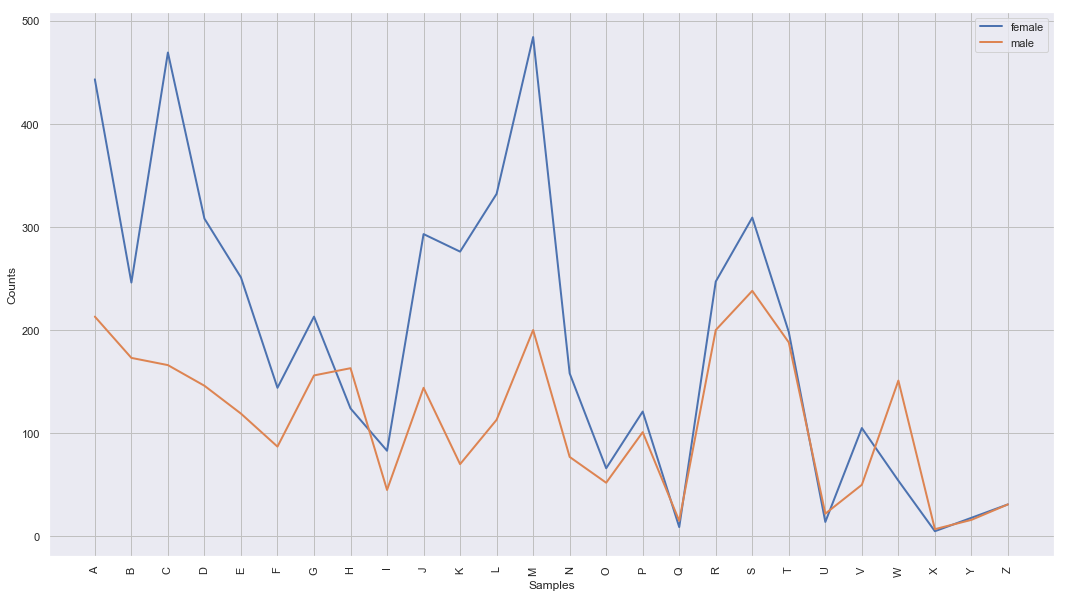

In [49]:
plt.figure(figsize=(18,10))
cfd = ConditionalFreqDist((fileid.split('.')[0], name[0]) 
                          for fileid in names.fileids() 
                          for name in names.words(fileid))
cfd.plot()

### 9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as *monstrous* in *Moby Dick* and in *Sense and Sensibility*?


### 10. Read the BBC News article: *UK's Vicky Pollards 'left behind'* http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on *LanguageLog*, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

### 12. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

### 13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using ```wn.all_synsets('n')```.

### 14. Define a function ```supergloss(s)``` that takes a synset ```s``` as its argument and returns a string consisting of the concatenation of the definition of ```s```, and the definitions of all the hypernyms and hyponyms of ```s```.

### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (```nltk.corpus.brown.categories()```). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

### 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

### 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

### 19. Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

### 20. Write a function ```word_freq()``` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.